<a href="https://colab.research.google.com/github/o2204/Telco-Customer-Churn-/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Overview:

This dataset represents customer information, where each row corresponds to a customer and each column contains attributes described in the column metadata. The dataset includes the following key information:

Churn Status: Indicates whether the customer left within the last month (column: Churn).

Services: The services each customer has subscribed to, including phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

Customer Account Information: Includes the duration of the customer relationship, contract type, payment method, paperless billing, monthly charges, and total charges.

Demographic Information: Includes customer gender, age range, and details about whether they have partners and dependents.

--------------------------------

Steps Taken in the Project:

Data Loading: Importing and loading the dataset.

Data Preprocessing & Cleansing: Preparing and cleaning the data for analysis, including handling missing values, encoding categorical features, and scaling numerical features.

Data Splitting: Dividing the dataset into training and testing subsets to evaluate model performance.

Modeling: Experimenting with multiple models to identify the one with the highest accuracy. In this step, we fine-tune hyperparameters to achieve the best possible performance.

Model Evaluation: Assessing the performance of the selected model using various evaluation metrics.

# **Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
#Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score , roc_auc_score

# **Read File**

In [2]:
data = pd.read_csv(r'/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

# **Data Preprocessing & Data Cleansing**

In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.shape

(7043, 21)

In [5]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
data.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


By Using Info Function We Can See Count Of Columns And Rows DataType Of Data And Missing Values Also.In The Data 2 Columns Are of Int datatype And 1 Float Datatype And 18 Are Object Datatype .
In The Data 7043 Rows And 21 Columns .
In The Data 2 Columns Are of Int datatype 1 Column Float Datatype And 18 Columns Are Object Datatype .
In The Data TotalCharges Column Is Float Datatype But It Show Object Datatype

In [9]:
# check missing value
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: >

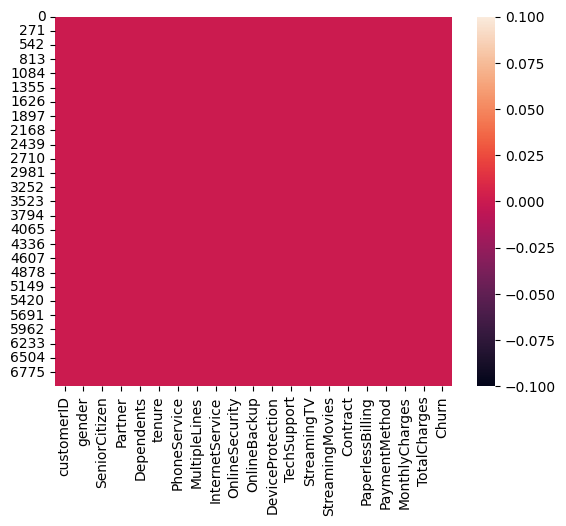

In [10]:
# heatmap for missing value
sns.heatmap(data.isnull())

In [11]:
print(f'The Total Number OF Duplicates: ',data.duplicated().sum())

The Total Number OF Duplicates:  0


In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869




This indicates that the dataset is imbalanced, with 5,174 instances of 'No_Churn' and 1,869 instances of 'Yes_Churn'

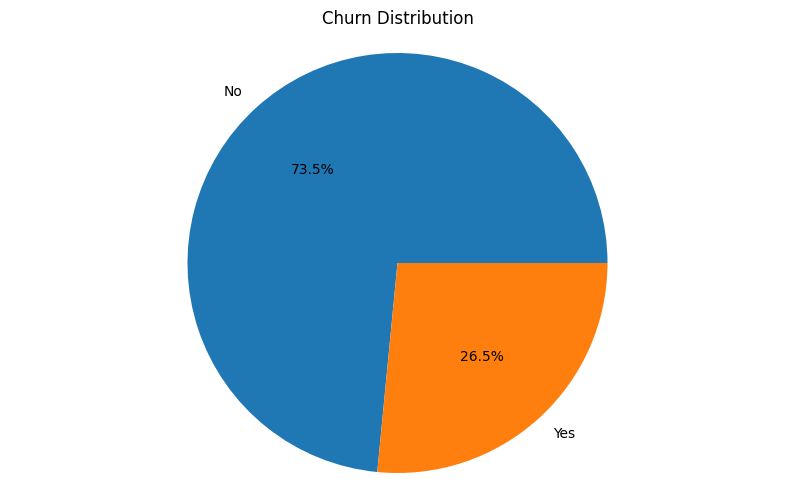

In [14]:
plt.figure(figsize=(10,6))
plt.pie(data['Churn'].value_counts(), labels=data['Churn'].value_counts().index, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

In [15]:
data.shape

(7043, 21)

In [16]:
# apply loop check unique value without int or float in dataset
for col in data.columns:
    if data[col].dtype != 'int64' and data[col].dtype != 'float64':
        print(f'{col} : {data[col].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


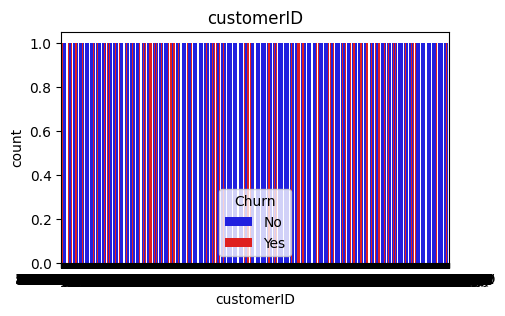

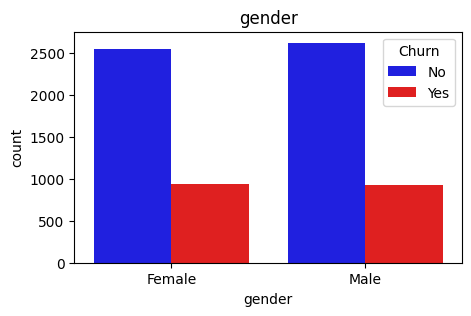

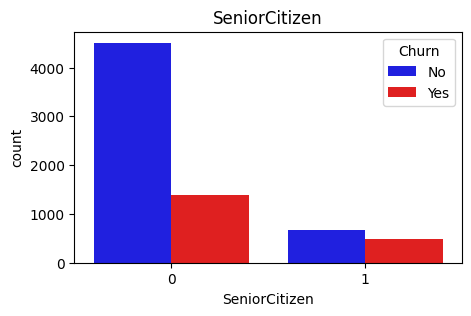

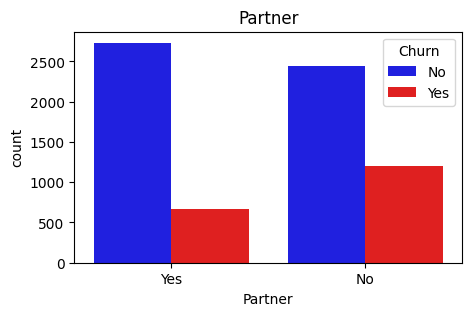

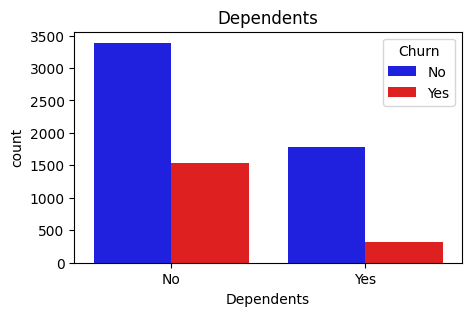

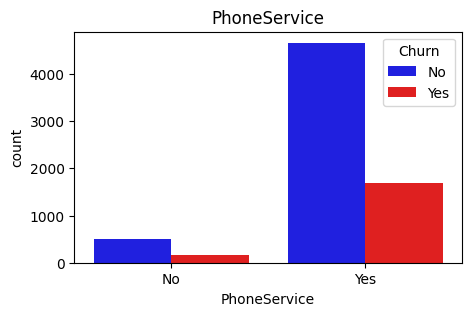

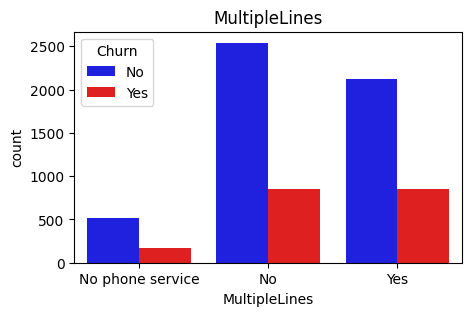

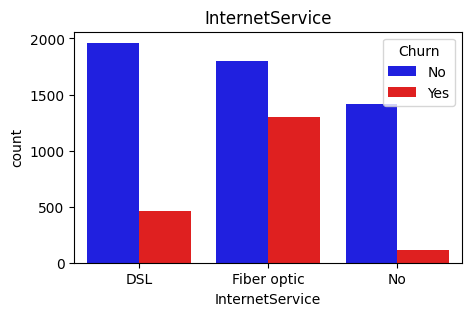

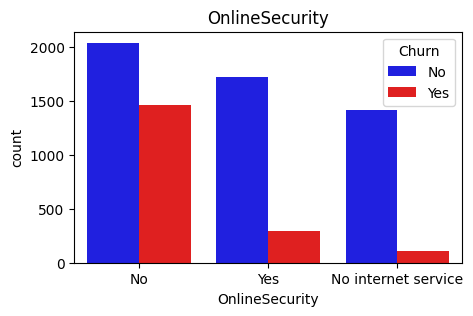

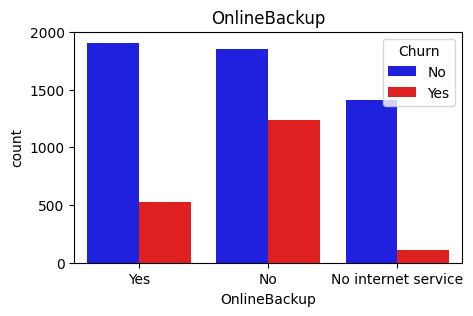

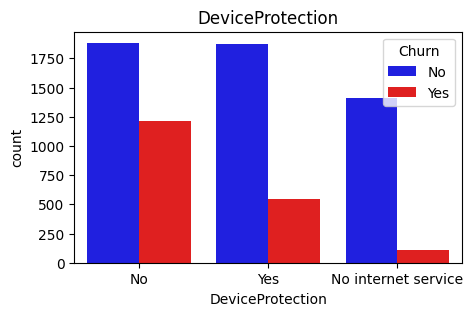

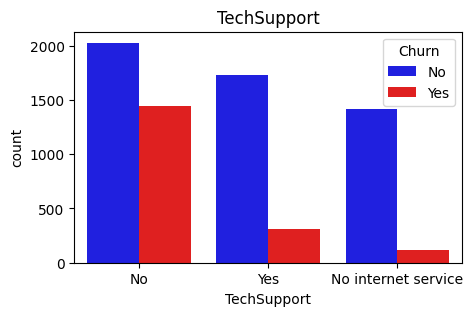

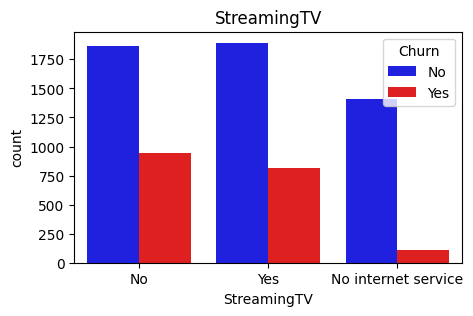

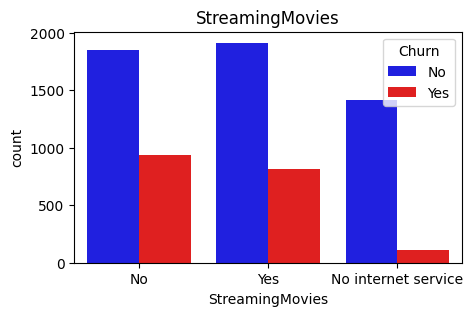

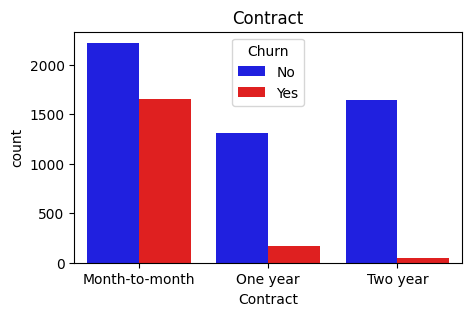

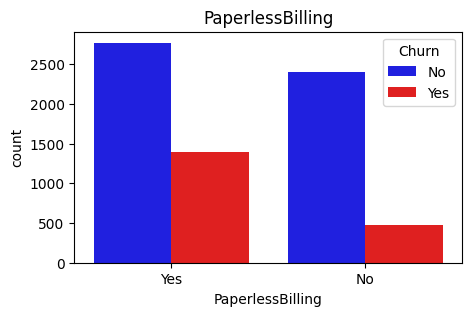

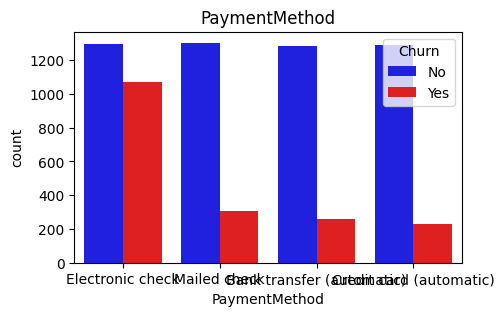

In [17]:
# Define colors for Yes and No
colors = {'Yes': 'red', 'No': 'blue'}

# Add missing keys for 0 and 1 in the palette
palette = {0: 'blue', 1: 'red'}

for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=data, x=predictor, hue='Churn', palette=colors)
    plt.title(predictor)
    plt.show()

In [18]:
# drop customerID
data.drop('customerID', axis=1, inplace=True)

In [19]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [20]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [21]:
data.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [22]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['category', 'object']).columns

# Apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,drop='first')  # sparce in new version in sklearn --> sparce_output
encoded_data = encoder.fit_transform(data[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
data.drop(columns=categorical_cols, inplace=True)

# Reset index of the DataFrame
data.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([data, encoded_df], axis=1)

In [23]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [24]:
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

# **Building Model**

In [25]:
# split data into X and y
X = df.drop('Churn', axis=1)
y = df['Churn']

In [26]:
print(X.isna().sum())

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [27]:
print(len(X))
print(len(y))

7043
7043


In [28]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.227521,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,0.0,1.000000,0.845274,0.847461,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0.0,0.152778,0.112935,0.037809,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1.0,0.055556,0.558706,0.033210,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [29]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled_df, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_res).value_counts())

Before SMOTE: Churn
0.0    5174
1.0    1869
Name: count, dtype: int64
After SMOTE: Churn
0.0    5174
1.0    5174
Name: count, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform, randint

#Splitting data to train and test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42,shuffle=True)

#List of the models with hyparparameters
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
     {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),

    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
     {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.5]}),

    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
     {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}),

    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear', max_iter=500),
     {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),

    ('K-Nearest Neighbors', KNeighborsClassifier(),
     {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),

    ('Decision Tree', DecisionTreeClassifier(random_state=42),
     {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}),

    ('Ada Boost', AdaBoostClassifier(random_state=42),
     {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.5]}),

    ('XG Boost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
     {'max_depth': [3, 4, 5],
      'learning_rate': [0.01, 0.05, 0.1, 0.2],
      'n_estimators': [100, 150, 200, 250],
      'subsample': [0.8, 0.9, 1.0]}),

    ('Naive Bayes', GaussianNB(), {})
]


#Train and evaluate
model_scores = []
for name, model, param_grid in models:
    print(f"Training {name}...")

    if param_grid:
          search = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=3,
                          verbose=0,
                          n_jobs=-1)
          search.fit(X_train, y_train)
          best_model = search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_model = model

    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    model_scores.append({
        'Model': name,
        'Accuracy': round(accuracy, 3),
        'F1 Score': round(f1, 3),
        'Recall': round(recall, 3),
        'Precision': round(precision, 3)
    })

    print(f"  Accuracy : {round(accuracy, 3)}")
    print(f"  F1 Score : {round(f1, 3)}")
    print(f"  Recall   : {round(recall, 3)}")
    print(f"  Precision: {round(precision, 3)}\n")

# Final summary table
scores_df = pd.DataFrame(model_scores)
print("\n=== Model Comparison ===")
print(scores_df.sort_values(by='F1 Score', ascending=False))

Training Random Forest...
  Accuracy : 0.869
  F1 Score : 0.869
  Recall   : 0.869
  Precision: 0.869

Training Gradient Boosting...
  Accuracy : 0.856
  F1 Score : 0.855
  Recall   : 0.856
  Precision: 0.856

Training Support Vector Machine...
  Accuracy : 0.847
  F1 Score : 0.847
  Recall   : 0.847
  Precision: 0.848

Training Logistic Regression...
  Accuracy : 0.796
  F1 Score : 0.795
  Recall   : 0.796
  Precision: 0.798

Training K-Nearest Neighbors...
  Accuracy : 0.813
  F1 Score : 0.811
  Recall   : 0.813
  Precision: 0.82

Training Decision Tree...
  Accuracy : 0.809
  F1 Score : 0.809
  Recall   : 0.809
  Precision: 0.811

Training Ada Boost...
  Accuracy : 0.808
  F1 Score : 0.807
  Recall   : 0.808
  Precision: 0.809

Training XG Boost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:46:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Accuracy : 0.857
  F1 Score : 0.856
  Recall   : 0.857
  Precision: 0.857

Training Naive Bayes...
  Accuracy : 0.757
  F1 Score : 0.752
  Recall   : 0.757
  Precision: 0.775


=== Model Comparison ===
                    Model  Accuracy  F1 Score  Recall  Precision
0           Random Forest     0.869     0.869   0.869      0.869
7                XG Boost     0.857     0.856   0.857      0.857
1       Gradient Boosting     0.856     0.855   0.856      0.856
2  Support Vector Machine     0.847     0.847   0.847      0.848
4     K-Nearest Neighbors     0.813     0.811   0.813      0.820
5           Decision Tree     0.809     0.809   0.809      0.811
6               Ada Boost     0.808     0.807   0.808      0.809
3     Logistic Regression     0.796     0.795   0.796      0.798
8             Naive Bayes     0.757     0.752   0.757      0.775


<ipython-input-31-b48daba80737>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)


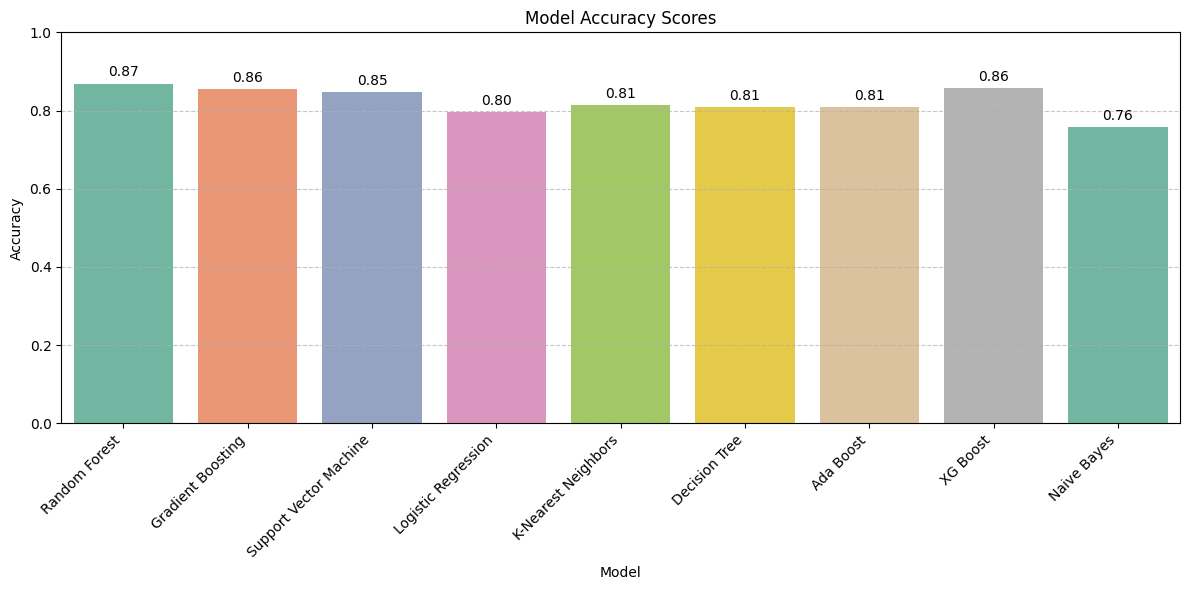

In [31]:
colors = sns.color_palette("Set2", n_colors=len(scores_df))


plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-32-14bcd6c674d3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=scores_df, palette='Set2')
<ipython-input-32-14bcd6c674d3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=scores_df, palette='Set2')
<ipython-input-32-14bcd6c674d3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=scores_df, palette='Set2')
<ipython-input-32-14bcd6c674d3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

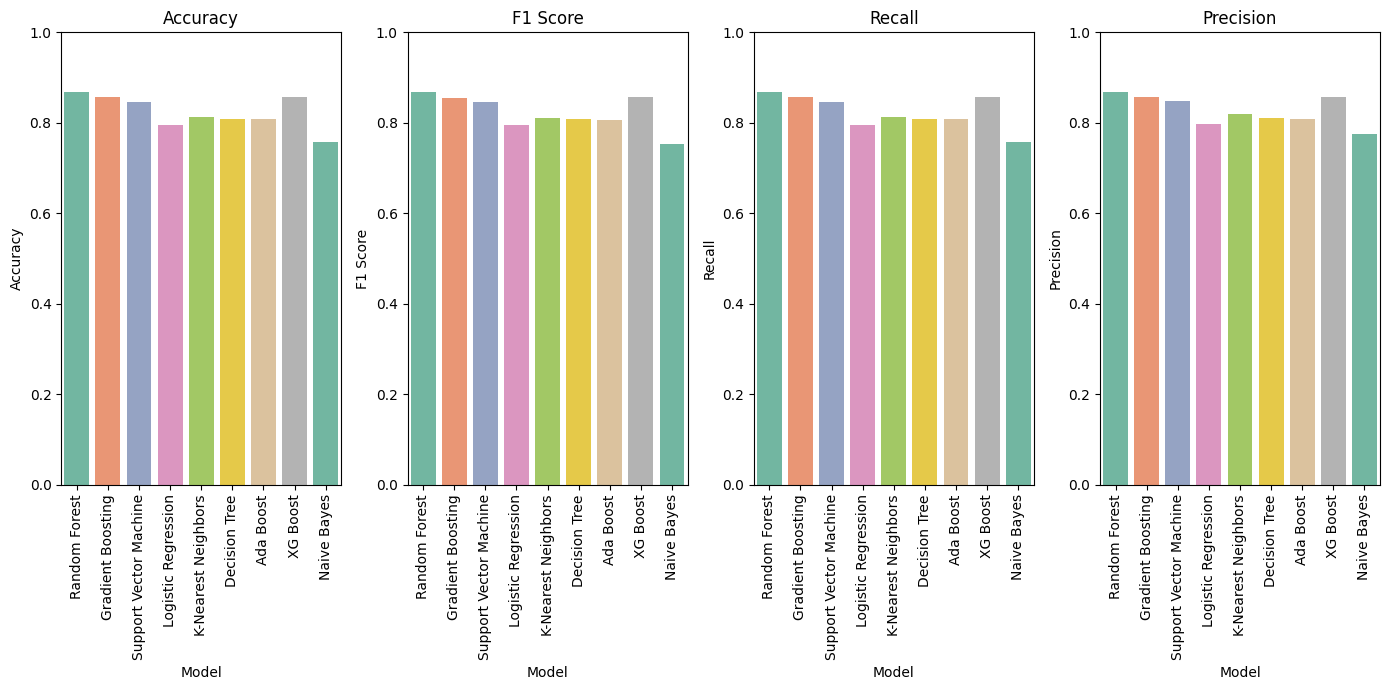

In [32]:
metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
plt.figure(figsize=(14, 7))

for i, metric in enumerate(metrics):
    plt.subplot(1, 4, i + 1)
    sns.barplot(x='Model', y=metric, data=scores_df, palette='Set2')
    plt.xticks(rotation=90)
    plt.ylim(0, 1)
    plt.title(metric)

plt.tight_layout()
plt.show()

In [33]:
best_model_row = scores_df.loc[scores_df['F1 Score'].idxmax()]

print("Best Model Based on F1 Score:")
print(f"Model Name: {best_model_row['Model']}")
print(f"Accuracy: {best_model_row['Accuracy']:.3f}")
print(f"F1 Score: {best_model_row['F1 Score']:.3f}")
print(f"Recall: {best_model_row['Recall']:.3f}")
print(f"Precision: {best_model_row['Precision']:.3f}")

Best Model Based on F1 Score:
Model Name: Random Forest
Accuracy: 0.869
F1 Score: 0.869
Recall: 0.869
Precision: 0.869


The Model Selected to this task is KNeighborsClassifier , is has a high accuracy in test comparing by other models

# **Evaluation**

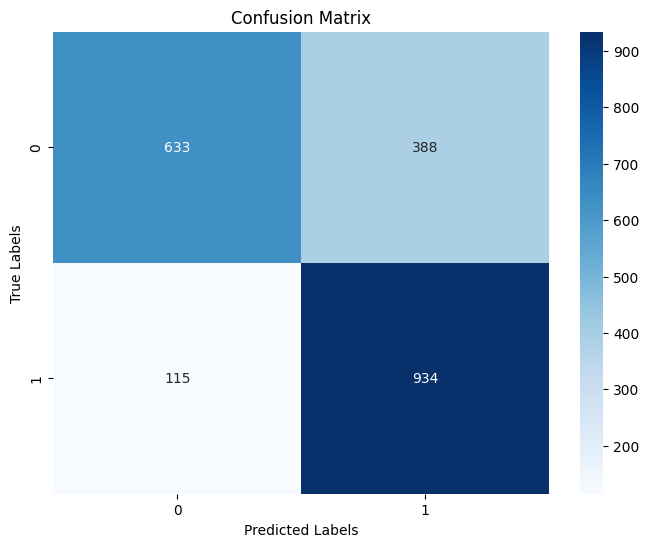

In [34]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.62      0.72      1021
         1.0       0.71      0.89      0.79      1049

    accuracy                           0.76      2070
   macro avg       0.78      0.76      0.75      2070
weighted avg       0.78      0.76      0.75      2070



In [36]:
y_probs = model.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_probs)
print("AUC:", auc_score)

AUC: 0.8464728779519508


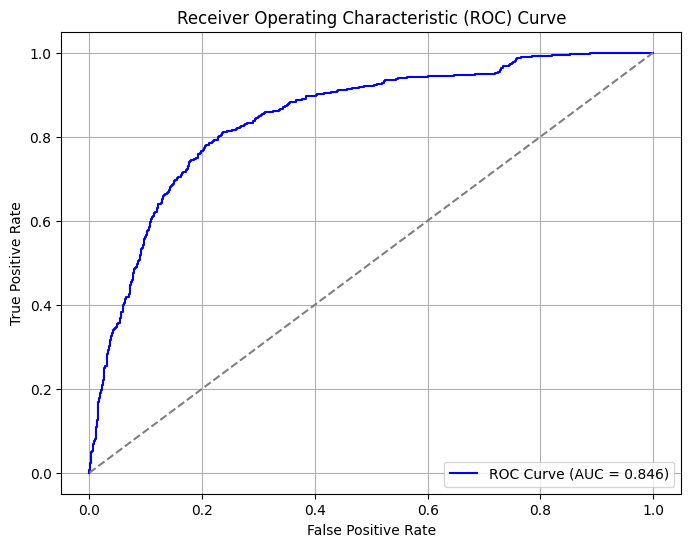

In [37]:
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


📊 Most Important Metrics (and Why) for Imbalanced Datasets:-

1. AUC-ROC :- model how well the model separates the two classes across all thresholds
2. Recall :- make know how all actual positives when the positive is very important
3. Precision :- make know how all actual negatives when the negative is very important

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled_df,y,test_size=0.2,random_state=42)
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred, average='weighted'), 3))
print("AUC:", round(roc_auc_score(y_test, y_probs), 3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.792
F1 Score: 0.779
AUC: 0.837

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.87      1036
         1.0       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



## Try to get more accurate model

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform, randint
import pandas as pd

sm = SMOTEENN()
X_result, y_result = sm.fit_resample(X, y)

# Splitting data into train and test
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_result, y_result, test_size=0.2, random_state=42, shuffle=True)

# List of models with hyperparameters
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
     {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),

    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
     {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.5]}),

    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
     {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}),

    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear', max_iter=500),
     {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),

    ('K-Nearest Neighbors', KNeighborsClassifier(),
     {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),

    ('Decision Tree', DecisionTreeClassifier(random_state=42),
     {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}),

    ('Ada Boost', AdaBoostClassifier(random_state=42),
     {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.5]}),

    ('XG Boost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
     {'max_depth': randint(3, 6), 'learning_rate': uniform(0.01, 0.2),
      'n_estimators': randint(100, 300), 'subsample': uniform(0.8, 0.2)}),

    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters
]

model_scores = []

for name, model, param_grid in models:
    print(f"Training {name}...")

    if param_grid:
        search = RandomizedSearchCV(estimator=model,
                                    param_distributions=param_grid,
                                    n_iter=20,
                                    cv=3,
                                    verbose=0,
                                    random_state=42,
                                    n_jobs=-1)
        search.fit(Xr_train, yr_train)
        best_model2 = search.best_estimator_
    else:
        model.fit(Xr_train, yr_train)
        best_model2 = model

    y_pred = best_model2.predict(Xr_test)

    accuracy = accuracy_score(yr_test, y_pred)
    f1 = f1_score(yr_test, y_pred, average='weighted')
    recall = recall_score(yr_test, y_pred, average='weighted')
    precision = precision_score(yr_test, y_pred, average='weighted')

    model_scores.append({
        'Model': name,
        'Accuracy': round(accuracy, 3),
        'F1 Score': round(f1, 3),
        'Recall': round(recall, 3),
        'Precision': round(precision, 3)
    })

    print(f"  Accuracy : {round(accuracy, 3)}")
    print(f"  F1 Score : {round(f1, 3)}")
    print(f"  Recall   : {round(recall, 3)}")
    print(f"  Precision: {round(precision, 3)}\n")

# Final summary table
scores_df2 = pd.DataFrame(model_scores)
print("\n=== Model Comparison ===")
print(scores_df2.sort_values(by='F1 Score', ascending=False))


Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


  Accuracy : 0.965
  F1 Score : 0.965
  Recall   : 0.965
  Precision: 0.965

Training Gradient Boosting...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


  Accuracy : 0.971
  F1 Score : 0.971
  Recall   : 0.971
  Precision: 0.971

Training Support Vector Machine...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
print(X_result.shape)
print(y_result.shape)

In [ ]:
colors = sns.color_palette("Set2", n_colors=len(scores_df2))


plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df2, palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
best_model_row2 = scores_df2.loc[scores_df2['F1 Score'].idxmax()]

print("Best Model Based on F1 Score:")
print(f"Model Name: {best_model_row2['Model']}")
print(f"Accuracy: {best_model_row2['Accuracy']:.2f}")
print(f"F1 Score: {best_model_row2['F1 Score']:.2f}")
print(f"Recall: {best_model_row2['Recall']:.2f}")
print(f"Precision: {best_model_row2['Precision']:.2f}")


In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(yr_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred = best_model2.predict(Xr_test)
print(classification_report(yr_test, y_pred))

In [ ]:
y_probs = model.predict_proba(Xr_test)[:,1]
auc_score = roc_auc_score(yr_test, y_probs)
print("AUC:", auc_score)

In [ ]:
# Predict probabilities
y_probs = model.predict_proba(Xr_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(yr_test, y_probs)
auc_score = roc_auc_score(yr_test, y_probs)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("(ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Dump the model as a pickle and joblib

In [48]:
import pickle
filename = 'Churn_Prediction_Model.pkl'
pickle.dump(best_model2, open(filename, 'wb'))

# joblib.dump(best_model2, 'bestmodel.pkl')